In [245]:
#We have a given dataset on Worldwide Gas/Petrol Prices

'''
By the means of this exploratory data analysis, we gather some interesting insights
and find out the correlation between various parameters. Let's get started. 
'''

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from bs4  import BeautifulSoup
import requests

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [246]:
df=pd.read_csv('/Users/tusharkhajuria/Downloads/Dataset_Petrol_new.csv',encoding="ISO-8859-1")
df.head()
#Checking the data we imported

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


In [247]:
df.tail()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
176,177,Belize,"4,001",0%,166.5,6.68,1.76,373.09,"4,436",664,4
177,178,Niue,51,0%,484.4,11.43,3.02,638.73,"15,586","1,364",3
178,179,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,462.13,"34,900","4,220",2
179,180,Montserrat,400,0%,1231.1,4.57,1.21,255.07,"12,589","2,755",2
180,181,Tonga,899,0%,136.3,16.20,4.28,905.22,"4,903",303,2


In [248]:
# Finding missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

S# - 0%
Country - 0%
Daily Oil Consumption (Barrels) - 0%
World Share - 0%
Yearly Gallons Per Capita - 0%
Price Per Gallon (USD) - 0%
Price Per Liter (USD) - 0%
Price Per Liter (PKR) - 0%
GDP Per Capita ( USD ) - 0%
Gallons GDP Per Capita Can Buy - 0%
xTimes Yearly Gallons Per Capita Buy - 0%


In [249]:
#No data is found to be missing 

#Now, we organise and clean data a bit
df.sort_values(by=['World Share'],inplace=True, ascending=False)
df.drop_duplicates().reset_index(drop=True)

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
1,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
2,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
3,6,Saudi Arabia,"3,302,000",3%,1560.2,2.35,0.62,131.34,"20,110","8,557",5
4,7,Brazil,"2,984,000",3%,221.9,5.36,1.42,299.27,"6,797","1,268",6
...,...,...,...,...,...,...,...,...,...,...,...
176,82,Sudan,"140,000",0%,53.9,4.80,1.27,268.18,596,124,2
177,83,Bolivia,"90,000",0%,125.1,2.06,0.54,115.06,"3,143","1,526",12
178,84,Ghana,"88,000",0%,47.4,4.87,1.29,271.99,"2,329",478,10
179,85,Ethiopia,"74,000",0%,10.9,2.70,0.71,150.59,936,347,32


In [250]:
#Removing the non-relevant columns 
df.drop('Price Per Liter (PKR)',inplace=True,axis=1)


In [251]:
#Adding price per liter in INR
prices=df['Price Per Liter (USD)']
'''
URL='https://www.google.com/search?client=firefox-b-d&q=1+usd+in+inr'
page = requests.get(URL,)
conversion_factor=BeautifulSoup(page.content, "html.parser")
conversion_factor_main = BeautifulSoup(conversion_factor.prettify(), "html.parser")
factor = conversion_factor_main.find('span', class_="DFlfde SwHCTb")
factor=float(factor)
'''
price_in_inr=prices*79.93
df.insert(len(df.columns),'Price Per Liter (INR)',price_in_inr)


<function matplotlib.pyplot.show(close=None, block=None)>

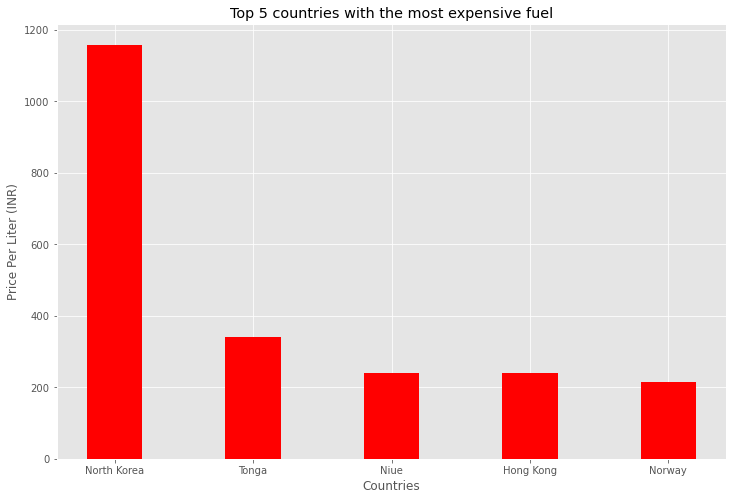

In [252]:
df.sort_values(by=['Price Per Liter (INR)'], inplace=True,ascending=False)
df2=df.head(5)
#To find out top 5 countries where fuel is most expensive
plt.bar(df2['Country'],df2['Price Per Liter (INR)'],color='Red',width=0.4)
plt.title('Top 5 countries with the most expensive fuel')
plt.xlabel('Countries')
plt.ylabel('Price Per Liter (INR)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

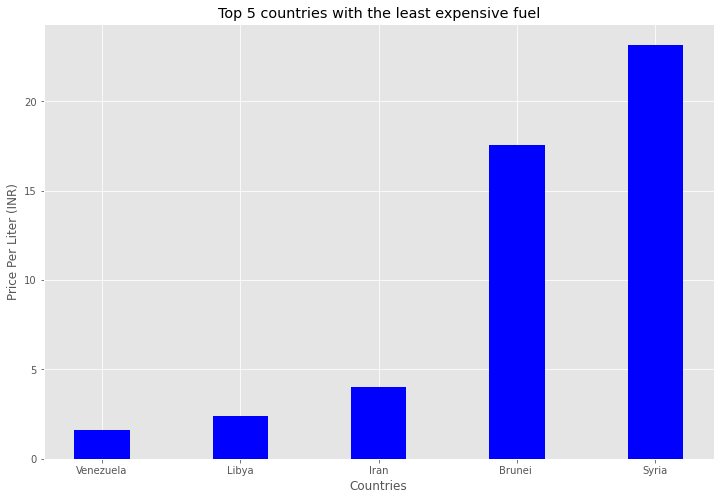

In [253]:
df.sort_values(by=['Price Per Liter (INR)'], inplace=True,ascending=True)
df3=df.head(5)
#To find out top 5 countries where fuel is least expensive
plt.bar(df3['Country'],df3['Price Per Liter (INR)'],color='Blue',width=0.4)
plt.title('Top 5 countries with the least expensive fuel')
plt.xlabel('Countries')
plt.ylabel('Price Per Liter (INR)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

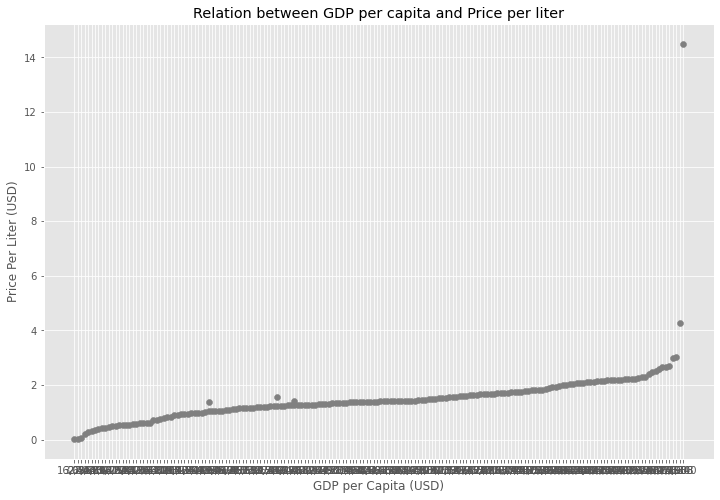

In [255]:
plt.scatter(df['GDP Per Capita ( USD )'],df['Price Per Liter (USD)'],color='Grey')
plt.title('Relation between GDP per capita and Price per liter')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Price Per Liter (USD)')
plt.show

In [256]:
#We can observe that countries with higher GDP per Capita have generally higher fuel prices

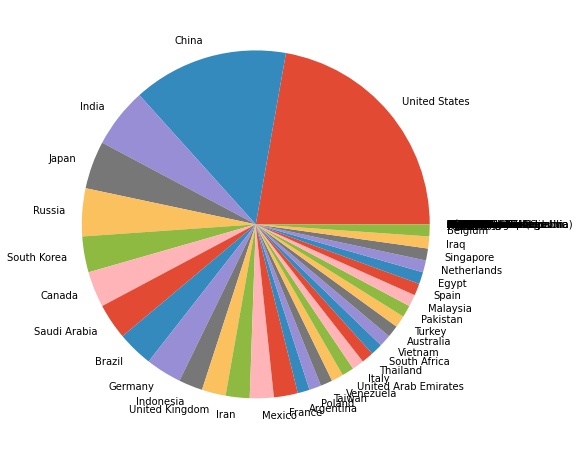

In [204]:
df.sort_values(by=['World Share'],inplace=True, ascending=False)
df['World Share'] = df['World Share'].str.replace('%', '')
df['World Share']=df['World Share'].str.zfill(2)
df['World Share'].astype(int)
plt.pie(df['World Share'],labels=df['Country'])
#plt.legend(title = "World Share of fuel per country:")
plt.show()

<AxesSubplot:>

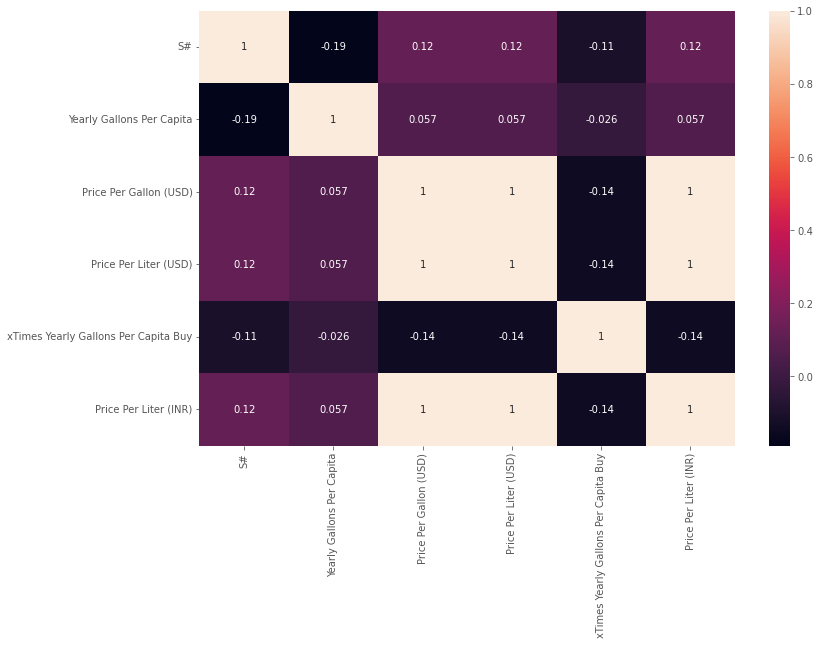

In [202]:
'''
We can see from this pie chart that top five countries, i.e. United States, China, India, Japan and Russia
have almost 50% of the World Share
'''
#Finding out correlation via heat map
df.corr()
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True) 

In [203]:
correlation_mat=df.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs
sorted_pairs=corr_pairs.sort_values()
high_correlation_sorted_pairs=sorted_pairs[(sorted_pairs)>0.5]
high_correlation_sorted_pairs=high_correlation_sorted_pairs[(sorted_pairs)<1]
high_correlation_sorted_pairs

Price Per Gallon (USD)  Price Per Liter (INR)     0.999997
Price Per Liter (INR)   Price Per Gallon (USD)    0.999997
Price Per Liter (USD)   Price Per Gallon (USD)    0.999997
Price Per Gallon (USD)  Price Per Liter (USD)     0.999997
Price Per Liter (INR)   Price Per Liter (USD)     1.000000
Price Per Liter (USD)   Price Per Liter (INR)     1.000000
dtype: float64

In [ ]:
#No high correlation pairs exist
#(Prices in different currencies/for different quantities of same fuel are not considered)

'''
So, from the above data, we can draw the following conclusions:
1. North Korea, Tonga, Hong Kong, Niue and Norway have the highest fuel costs
2. Venezeula, Libya, Iran, Brunei and Syria have lowest fuel costs
3. High correlation pairs do not exist for the aforementioned data
'''